In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
from tqdm import *
from scipy import spatial
import matplotlib.gridspec as gridspec
import stats

cdm = h5py.File('Data/COLOR_CDM_DM_subHaloes_z0.00_v2.hdf5', 'r')
wdm = h5py.File('Data/COLOR_WDM_DM_subHaloes_z0.00_v2.hdf5', 'r')

cdm_galaxy = h5py.File('Data\COLOR_CDM_galaxies.hdf5', 'r')
wdm_galaxy = h5py.File('Data\COLOR_WDM_galaxies.hdf5', 'r')

print(cdm,wdm,cdm_galaxy,wdm_galaxy)

<HDF5 file "COLOR_CDM_DM_subHaloes_z0.00_v2.hdf5" (mode r)> <HDF5 file "COLOR_WDM_DM_subHaloes_z0.00_v2.hdf5" (mode r)> <HDF5 file "COLOR_CDM_galaxies.hdf5" (mode r)> <HDF5 file "COLOR_WDM_galaxies.hdf5" (mode r)>


# Access the masses and positions of CDM and WDM halos

In [2]:
# Access mass/position for wdm/cdm
print(list(cdm.keys()),list(wdm.keys()))

cdm_mass = cdm['SubhaloMass'][:]
cdm_position = cdm['SubhaloPos'][:]

wdm_mass = wdm['SubhaloMass'][:]
wdm_position = wdm['SubhaloPos'][:]

cdm_mass, cdm_position, wdm_mass, wdm_position

['IsCentral', 'R200', 'SubhaloMass', 'SubhaloPos'] ['IsCentral', 'R200', 'SubhaloMass', 'SubhaloPos']


(array([1.87617493e+14, 1.84468594e+14, 6.89978024e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[10.93832207, 81.23078918, 54.77935028],
        [17.94562721, 79.86347961, 53.3843956 ],
        [15.62266159, 78.18474579, 52.83857346],
        ...,
        [ 1.47748184,  3.54455233, 99.53264618],
        [99.32190704,  2.56014371,  2.57368279],
        [99.0621109 ,  4.18381071,  2.89533401]]),
 array([1.89941540e+14, 1.86912732e+14, 6.83256610e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[1.80150642e+01, 7.98655701e+01, 5.34328232e+01],
        [1.09048624e+01, 8.12610779e+01, 5.48179703e+01],
        [1.56323385e+01, 7.81665344e+01, 5.28157997e+01],
        ...,
        [6.02296066e+00, 5.05078554e+00, 9.79758301e+01],
        [5.75055540e-01, 3.26677370e+00, 3.52767438e-01],
        [2.07897183e-03, 3.23730040e+00, 9.97708917e-01]]))

### Filter out halos below the resolution limit

In [3]:
m_res = 8.8*10**6*50
m_res

440000000.0

In [4]:
cdm_filtered_ind=np.where(cdm_mass>m_res)[0]
wdm_filtered_ind=np.where(wdm_mass>m_res)[0]

len(cdm_position),len(cdm_filtered_ind),len(wdm_position),len(wdm_filtered_ind)

(4770041, 2098590, 3082275, 1408939)

In [5]:
#access the filtered positions
cdm_position_filtered=cdm_position[cdm_filtered_ind]
wdm_position_filtered=wdm_position[wdm_filtered_ind]

#and the filtered masses
cdm_mass_filtered=cdm_mass[cdm_filtered_ind]
wdm_mass_filtered=wdm_mass[wdm_filtered_ind]

len(cdm_mass_filtered)

2098590

# Access the masses and positions of CDM and WDM galaxies

In [6]:
print(list(cdm_galaxy.keys()),list(wdm_galaxy.keys()))

cdm_galaxy_position = cdm_galaxy['GalaxyPos'][:]
wdm_galaxy_position = wdm_galaxy['GalaxyPos'][:]

cdm_galaxy_position, wdm_galaxy_position

['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass'] ['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass']


(array([[17.43208122, 80.25539398, 54.00876999],
        [17.43210793, 80.22522736, 53.97425079],
        [19.06316185, 80.02703857, 54.18655014],
        ...,
        [67.22305298, 64.69418335, 36.19010544],
        [ 7.28926134, 78.05925751, 49.41135025],
        [ 6.75961494, 77.04682159, 48.55372238]]),
 array([[17.61932182, 79.06235504, 52.68593979],
        [18.65647697, 80.58162689, 52.30108261],
        [18.58250046, 80.91363525, 52.45199203],
        ...,
        [76.68208313, 28.50509262, 59.96631622],
        [33.62237167,  9.74790382,  4.82571173],
        [52.58901978, 44.79496765, 78.47211456]]))

# Calculate the mass within a sphere

In [10]:
#create the trees
cdm_filtered_tree = spatial.cKDTree(cdm_position_filtered)
wdm_filtered_tree = spatial.cKDTree(wdm_position_filtered)

### First do CDM

In [11]:
# create an empty array for the mass of the spheres
cdm_5Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(cdm_galaxy_position)):
    
    #find the indices of all halos in a 5 Mpc radius around each galaxy
    ind = cdm_filtered_tree.query_ball_point(cdm_galaxy_position[i], 5)
    
    #sum the masses of these halos
    cdm_5Mpc_sphere_mass.append(np.sum(cdm_mass_filtered[ind]))

100%|█████████████████████████████████████████████████████████████████████████| 661632/661632 [21:26<00:00, 514.38it/s]


In [12]:
cdm_5Mpc_sphere_mass=np.array(cdm_5Mpc_sphere_mass)
np.savetxt("Calculations/cdm_5Mpc_sphere_mass_filtered.txt", cdm_5Mpc_sphere_mass, fmt = "%f")
len(cdm_5Mpc_sphere_mass), len(cdm_galaxy_position)

(661632, 661632)

In [13]:
# create an empty array for the mass of the spheres
cdm_10Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(cdm_galaxy_position)):
    
    #find the indices of all halos in a 10 Mpc radius around each galaxy
    ind = cdm_filtered_tree.query_ball_point(cdm_galaxy_position[i], 10)
    
    #sum the masses of these halos
    cdm_10Mpc_sphere_mass.append(np.sum(cdm_mass_filtered[ind]))

100%|███████████████████████████████████████████████████████████████████████| 661632/661632 [1:08:53<00:00, 160.08it/s]


In [14]:
cdm_10Mpc_sphere_mass=np.array(cdm_10Mpc_sphere_mass)
np.savetxt("Calculations/cdm_10Mpc_sphere_mass_filtered.txt", cdm_10Mpc_sphere_mass, fmt = "%f")
len(cdm_10Mpc_sphere_mass), len(cdm_galaxy_position)

(661632, 661632)

### Then WDM

In [15]:
# create an empty array for the mass of the spheres
wdm_5Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(wdm_galaxy_position)):
    
    #find the indices of all halos in a 5 Mpc radius around each galaxy
    ind = wdm_filtered_tree.query_ball_point(wdm_galaxy_position[i], 5)
    
    #sum the masses of these halos
    wdm_5Mpc_sphere_mass.append(np.sum(wdm_mass_filtered[ind]))

100%|█████████████████████████████████████████████████████████████████████████| 477870/477870 [10:47<00:00, 738.31it/s]


In [16]:
wdm_5Mpc_sphere_mass=np.array(wdm_5Mpc_sphere_mass)
np.savetxt("Calculations/wdm_5Mpc_sphere_mass_filtered.txt", wdm_5Mpc_sphere_mass, fmt = "%f")
len(wdm_5Mpc_sphere_mass), len(wdm_galaxy_position)

(477870, 477870)

In [17]:
# create an empty array for the mass of the spheres
wdm_10Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(wdm_galaxy_position)):
    
    #find the indices of all halos in a 10 Mpc radius around each galaxy
    ind = wdm_filtered_tree.query_ball_point(wdm_galaxy_position[i], 10)
    
    #sum the masses of these halos
    wdm_10Mpc_sphere_mass.append(np.sum(wdm_mass_filtered[ind]))

100%|█████████████████████████████████████████████████████████████████████████| 477870/477870 [34:52<00:00, 228.38it/s]


In [18]:
wdm_10Mpc_sphere_mass=np.array(wdm_10Mpc_sphere_mass)
np.savetxt("Calculations/wdm_10Mpc_sphere_mass_filtered.txt", wdm_10Mpc_sphere_mass, fmt = "%f")
len(wdm_10Mpc_sphere_mass), len(wdm_galaxy_position)

(477870, 477870)

# Calculate the envelope mass

In [7]:
cdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_5Mpc_sphere_mass_filtered.txt")
wdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_5Mpc_sphere_mass_filtered.txt")

In [8]:
cdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_10Mpc_sphere_mass_filtered.txt")
wdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_10Mpc_sphere_mass_filtered.txt")

In [9]:
cdm_envelope_mass=cdm_10Mpc_sphere_mass-cdm_5Mpc_sphere_mass
wdm_envelope_mass=wdm_10Mpc_sphere_mass-wdm_5Mpc_sphere_mass
len(cdm_envelope_mass),len(wdm_envelope_mass),cdm_envelope_mass, wdm_envelope_mass

(661632, 477870, array([5.29543271e+14, 5.29879347e+14, 5.48000056e+14, ...,
        7.09475586e+13, 7.22646416e+14, 6.72348636e+14]), array([5.61700612e+14, 5.19950930e+14, 5.67300725e+14, ...,
        1.25458107e+14, 8.05311434e+13, 4.94819599e+13]))

# Compare the total galaxy abundance

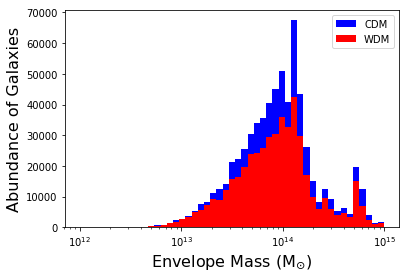

In [10]:
bins=np.logspace(np.log10(1e12),np.log10(1e15), 50)
plt.hist(cdm_envelope_mass,bins=bins,label='CDM',color='blue')
plt.hist(wdm_envelope_mass,bins=bins,label='WDM',color='red')
plt.xlabel("Envelope Mass (M$_{\odot}$)", fontsize=16)
plt.ylabel('Abundance of Galaxies',fontsize=16)
plt.xscale("Log")
plt.legend()
plt.show()

# Compute the Stellar Mass Function for galaxies in over/underdensities
### Access the masses of CDM and WDM galaxies

In [11]:
cdm_galaxy_mass = cdm_galaxy['StellarMass'][:]
wdm_galaxy_mass = wdm_galaxy['StellarMass'][:]

cdm_galaxy_mass, wdm_galaxy_mass

(array([2.37800096e+08, 1.14038586e+03, 4.39743280e+07, ...,
        6.31516409e+00, 3.49365275e+06, 2.19290527e+04]),
 array([3873670.  , 5328977.  , 1002360.25, ..., 2697151.5 ,  542400.5 ,
        2462471.  ]))

### Split the galaxies into the top 20% and bottom 20%, filtering out galaxies < 10$^6$ M$_\odot$

In [12]:
# filter out galaxies less than 10^6 solar masses
cdm_envelope_mass_filtered=cdm_envelope_mass[cdm_galaxy_mass>10**6]
wdm_envelope_mass_filtered=wdm_envelope_mass[wdm_galaxy_mass>10**6]

cdm_galaxy_mass_filtered=cdm_galaxy_mass[cdm_galaxy_mass>10**6]
wdm_galaxy_mass_filtered=wdm_galaxy_mass[wdm_galaxy_mass>10**6]

len(cdm_galaxy_mass),len(cdm_galaxy_mass_filtered)

(661632, 407397)

In [13]:
frac = 20.0
th_low_cdm = np.percentile(cdm_envelope_mass_filtered,frac)
th_top_cdm = np.percentile(cdm_envelope_mass_filtered,100.-frac)
th_low_wdm = np.percentile(wdm_envelope_mass_filtered,frac)
th_top_wdm = np.percentile(wdm_envelope_mass_filtered,100.-frac)

cdm_top_galaxy_mass_filtered = cdm_galaxy_mass_filtered[cdm_envelope_mass_filtered>th_top_cdm]
cdm_low_galaxy_mass_filtered = cdm_galaxy_mass_filtered[cdm_envelope_mass_filtered<th_low_cdm]
wdm_top_galaxy_mass_filtered = wdm_galaxy_mass_filtered[wdm_envelope_mass_filtered>th_top_wdm]
wdm_low_galaxy_mass_filtered = wdm_galaxy_mass_filtered[wdm_envelope_mass_filtered<th_low_wdm]

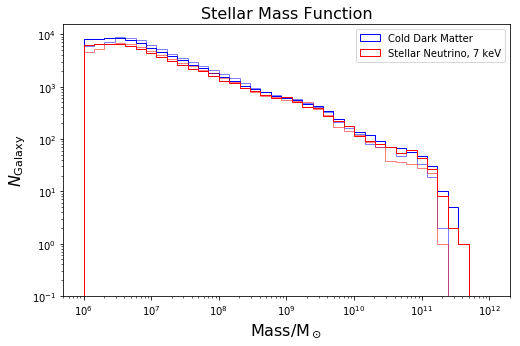

In [14]:
# Create a histogram
bins = np.logspace(6, 12, 40) #always pre-specify bins

fig = plt.figure(figsize = (8,5))
N_cdm_top,bins_cdm_top,patches_cdm_top=plt.hist(cdm_top_galaxy_mass_filtered,label='Cold Dark Matter',color='blue',
                                                bins=bins, log = True, histtype = 'step')
N_cdm_low,bins_cdm_low,patches_cdm_low=plt.hist(cdm_low_galaxy_mass_filtered,color='blue', log = True,bins=bins,
                                                histtype = 'step',alpha=0.5)
N_wdm_top,bins_wdm_top,patches_wdm_top=plt.hist(wdm_top_galaxy_mass_filtered,label='Stellar Neutrino, 7 keV',
                                                bins=bins, color='red', log = True, histtype = 'step')
N_wdm_low,bins_wdm_low,patches_wdm_low=plt.hist(wdm_low_galaxy_mass_filtered,color='red',bins=bins, log = True, 
                                                histtype = 'step',alpha=0.5)
plt.title("Stellar Mass Function", fontsize = 16)
plt.ylabel(r"$N_{\rm {Galaxy}}$", fontsize = 16)
plt.xlabel("Mass/M$_\odot$", fontsize = 16)
plt.xscale("Log")
plt.legend()

plt.show()

### Define a function for the errorbars

In [15]:
# compute the errorbars on the ratio
def giveratio(dn_a, dn_b, err_a, err_b, volume):
    
    # Turn into a numpy array
    err_a_low=np.array(err_a)[:,0]/volume
    err_a_high=np.array(err_a)[:,1]/volume
    err_b_low=np.array(err_b)[:,0]/volume
    err_b_high=np.array(err_b)[:,1]/volume
    
    # Ratio and errors of mf_a / mf_b
    ratio = dn_a / dn_b
    rel_a_low, rel_a_high = (dn_a-err_a_low) / dn_a, (err_a_high-dn_a) / dn_a
    rel_b_low, rel_b_high = (dn_b-err_b_low) /dn_b, (err_b_high-dn_b) / dn_b
    err_ratio_low = ratio * np.sqrt(rel_a_low**2 + rel_b_low**2)
    err_ratio_high = ratio * np.sqrt(rel_a_high**2 + rel_b_high**2)
    
    return ratio, err_ratio_low, err_ratio_high

# compute the errorbars
def errorbars(N_cdm_top, N_cdm_low, N_wdm_top, N_wdm_low):
    
    volume = 100.0**3 #Mpc^3

    # Compute Poisson errors in each bin
    n_cdm_top,n_cdm_low,n_wdm_top,n_wdm_low=N_cdm_top/volume,N_cdm_low/volume,N_wdm_top/volume,N_wdm_low/volume
    errors_cdm_top,errors_cdm_low,errors_wdm_top,errors_wdm_low=[],[],[],[]
    low_lim_cdm_top,low_lim_cdm_low,low_lim_wdm_top,low_lim_wdm_low=[],[],[],[]
    up_lim_cdm_top,up_lim_cdm_low,up_lim_wdm_top,up_lim_wdm_low=[],[],[],[]

    for n, errors, N, low_lim, up_lim in zip([n_cdm_top, n_cdm_low, n_wdm_top, n_wdm_low],
                                             [errors_cdm_top,errors_cdm_low,errors_wdm_top,errors_wdm_low],
                                             [N_cdm_top, N_cdm_low, N_wdm_top, N_wdm_low], 
                                             [low_lim_cdm_top,low_lim_cdm_low,low_lim_wdm_top,low_lim_wdm_low],
                                             [up_lim_cdm_top,up_lim_cdm_low,up_lim_wdm_top,up_lim_wdm_low]):

        for i in range(len(n)):
            errors.append(stats.poisson_err(N[i]))

        # Turn into a numpy array
        errLow = np.log10(np.array(errors)[:,0] / volume)
        errHigh = np.log10(np.array(errors)[:,1]/ volume)

        # The plt.errorbar module needs yerr to be inserted as a 
        # relative difference to the y-value of the coordinate.
        low_lim.append(np.log10(n) - errLow)
        up_lim.append(errHigh - np.log10(n))
        
    # get the error on the ratio
    ratio_top, low_lim_ratio_top, up_lim_ratio_top = giveratio(n_wdm_top, n_cdm_top, errors_wdm_top, 
                                                       errors_cdm_top, volume)
    ratio_low, low_lim_ratio_low, up_lim_ratio_low = giveratio(n_wdm_low, n_cdm_low, errors_wdm_low, 
                                                           errors_cdm_low, volume)
    
    # return the relevant poisson errorbars
    low_lim=low_lim_cdm_top[0],low_lim_cdm_low[0],low_lim_wdm_top[0],low_lim_wdm_low[0]
    up_lim=up_lim_cdm_top[0],up_lim_cdm_low[0],up_lim_wdm_top[0],up_lim_wdm_low[0]
    ratio=ratio_top,ratio_low,low_lim_ratio_top,low_lim_ratio_low,up_lim_ratio_top,up_lim_ratio_low
    
    return low_lim,up_lim,ratio

In [16]:
low_lim, up_lim, ratio = errorbars(N_cdm_top, N_cdm_low, N_wdm_top, N_wdm_low)
low_lim_cdm_top, low_lim_cdm_low, low_lim_wdm_top, low_lim_wdm_low = low_lim
up_lim_cdm_top, up_lim_cdm_low, up_lim_wdm_top, up_lim_wdm_low = up_lim
ratio_top, ratio_low, low_lim_ratio_top, low_lim_ratio_low, up_lim_ratio_top, up_lim_ratio_low = ratio

C:\Users\shife\OneDrive\Harvard_Stuff\Astro_98\stats.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\shife\OneDrive\Harvard_Stuff\Astro_98\stats.py:27: RuntimeWarning: invalid value encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\shife\Anaconda3\lib\site-packag

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3186: RuntimeWarning: invalid value encountered in double_scalars
  high = [thisx + thiserr for thisx, thiserr
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavio

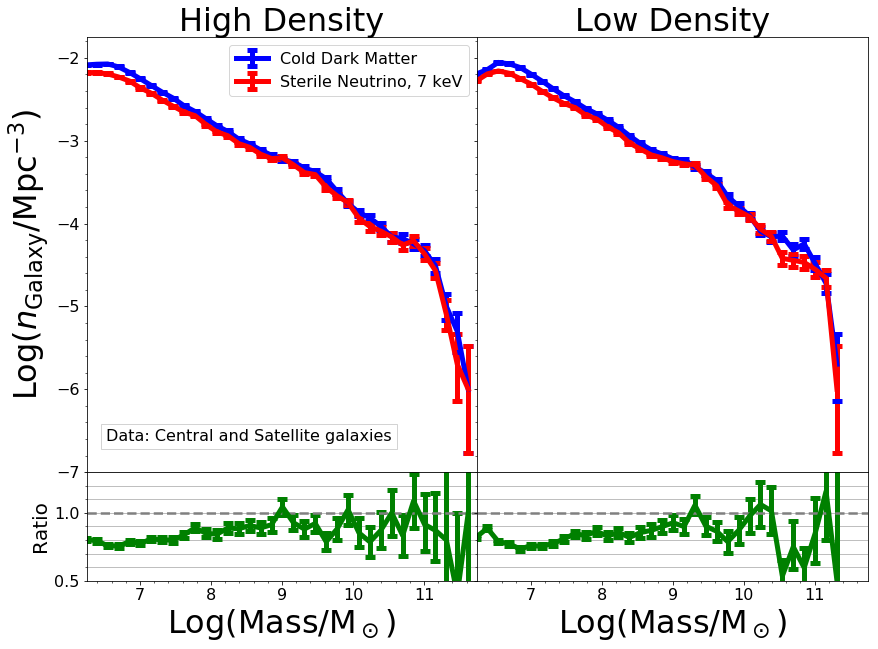

In [17]:
volume = 100.0**3 #Mpc^3
n_cdm_top = N_cdm_top/volume
n_cdm_low = N_cdm_low/volume
n_wdm_top = N_wdm_top/volume
n_wdm_low = N_wdm_low/volume

textstr = 'Data: Central and Satellite galaxies'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(14,10))
grid = gridspec.GridSpec(2,2, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])

#High density
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_cdm_top),yerr=[low_lim_cdm_top,up_lim_cdm_top],
               capsize = 5,capthick = 5,label = "Cold Dark Matter",linewidth = 5,color = "blue")
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_wdm_top),yerr = [low_lim_wdm_top,up_lim_wdm_top],
               capsize = 5,capthick = 5,label = "Sterile Neutrino, 7 keV",linewidth = 5,color = "red")
grid0.text(0.05, 0.1, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)
grid0.set_ylabel(r"Log($n_{\rm {Galaxy}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.set_title('High Density',fontsize=32)
grid0.legend(fontsize = 16)

grid2.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio_top, yerr = [low_lim_ratio_top, up_lim_ratio_top], 
               capsize = 5, capthick = 5, linewidth = 5, color = "green")
grid2.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid2.set_ylabel("Ratio", fontsize=20)
grid2.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)

#Low density
grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_cdm_low),yerr = [low_lim_cdm_low,up_lim_cdm_low],
               capsize = 5,capthick = 5,label = "Low Density",linewidth = 5, color = "blue")
grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_wdm_low),yerr = [low_lim_wdm_low,up_lim_wdm_low],
               capsize = 5,capthick = 5,label = "Low Density",linewidth = 5, color = "red")
grid1.set_title('Low Density',fontsize=32)

grid3.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio_low, yerr = [low_lim_ratio_low, up_lim_ratio_low], 
               capsize = 5, capthick = 5, linewidth = 5, color = "green")
grid3.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid3.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)

for i in range(4):
    plt.subplot(grid[i]).tick_params(labelsize=16)
    plt.subplot(grid[i]).set_xlim(6.25, 11.75)
    plt.subplot(grid[i]).minorticks_on()
    
for i in [0,1]:
    plt.subplot(grid[i]).set_ylim(-7, -1.75)
    
for i in [2,3]:
    plt.subplot(grid[i]).set_ylim(0.5, 1.3)
    plt.subplot(grid[i]).yaxis.grid(which = "both")
    
for i in [1,3]:
    plt.subplot(grid[i]).set_yticklabels([])
    
plt.savefig('Images/Summer2020/SMF_both.pdf')
plt.show()

### Total galaxies > 10$^9$ M$_\odot$ in the least dense environments

In [18]:
print('CDM:',np.sum(N_cdm_low[bins[:-1]>10**9]))
print('WDM:',np.sum(N_wdm_low[bins[:-1]>10**9]))

CDM: 2685.0
WDM: 2434.0


### Total galaxies > 10$^9$ M$_\odot$ in the most dense environments

In [19]:
print('CDM:',np.sum(N_cdm_top[bins[:-1]>10**9]))
print('WDM:',np.sum(N_wdm_top[bins[:-1]>10**9]))

CDM: 2845.0
WDM: 2541.0


# Compute the Cumulative Stellar Mass Function

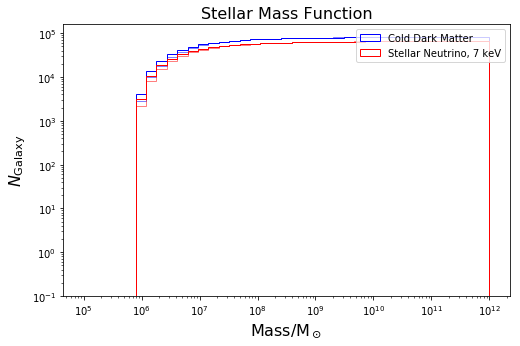

In [20]:
# Create a histogram
bins = np.logspace(5, 12, 40) #always pre-specify bins

fig = plt.figure(figsize = (8,5))
N_cdm_top, bins, patches = plt.hist(cdm_top_galaxy_mass_filtered, color = 'blue', bins = bins, log = True,
                                    label = 'Cold Dark Matter', histtype = 'step', cumulative = 'True')
N_cdm_low, bins, patches = plt.hist(cdm_low_galaxy_mass_filtered, color = 'blue', log = True, bins = bins,
                                    histtype = 'step', alpha = 0.5, cumulative = 'True')
N_wdm_top, bins, patches = plt.hist(wdm_top_galaxy_mass_filtered, bins = bins, color = 'red', log = True,
                                    label = 'Stellar Neutrino, 7 keV', histtype = 'step', cumulative = 'True')
N_wdm_low, bins, patches = plt.hist(wdm_low_galaxy_mass_filtered, color = 'red', bins = bins, log = True, 
                                    histtype='step', alpha = 0.5, cumulative = 'True')
plt.title("Stellar Mass Function", fontsize = 16)
plt.ylabel(r"$N_{\rm {Galaxy}}$", fontsize = 16)
plt.xlabel("Mass/M$_\odot$", fontsize = 16)
plt.xscale("Log")
plt.legend()

plt.show()

### Reverse the array!

In [21]:
N_cdm_top = len(cdm_top_galaxy_mass_filtered)-N_cdm_top
N_cdm_low = len(cdm_low_galaxy_mass_filtered)-N_cdm_low
N_wdm_top = len(wdm_top_galaxy_mass_filtered)-N_wdm_top
N_wdm_low = len(wdm_low_galaxy_mass_filtered)-N_wdm_low

### Compute the errorbars

In [22]:
low_lim, up_lim, ratio = errorbars(N_cdm_top, N_cdm_low, N_wdm_top, N_wdm_low)
low_lim_cdm_top, low_lim_cdm_low, low_lim_wdm_top, low_lim_wdm_low = low_lim
up_lim_cdm_top, up_lim_cdm_low, up_lim_wdm_top, up_lim_wdm_low = up_lim
ratio_top, ratio_low, low_lim_ratio_top, low_lim_ratio_low, up_lim_ratio_top, up_lim_ratio_low = ratio

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


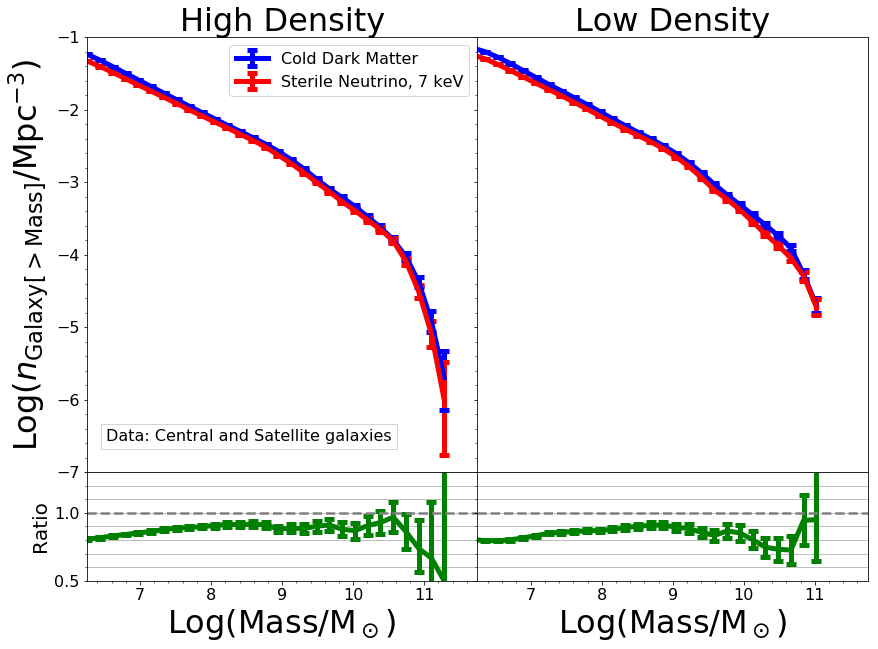

In [23]:
volume = 100.0**3 #Mpc^3
n_cdm_top = N_cdm_top/volume
n_cdm_low = N_cdm_low/volume
n_wdm_top = N_wdm_top/volume
n_wdm_low = N_wdm_low/volume

textstr = 'Data: Central and Satellite galaxies'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(14,10))
grid = gridspec.GridSpec(2,2, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])

#High density
grid0.errorbar(np.log10(bins[:-1]),np.log10(n_cdm_top),yerr=[low_lim_cdm_top,up_lim_cdm_top],
               capsize = 5,capthick = 5,label = "Cold Dark Matter",linewidth = 5,color = "blue")
grid0.errorbar(np.log10(bins[:-1]),np.log10(n_wdm_top),yerr = [low_lim_wdm_top,up_lim_wdm_top],
               capsize = 5,capthick = 5,label = "Sterile Neutrino, 7 keV",linewidth = 5,color = "red")
grid0.text(0.05, 0.1, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)
grid0.set_ylabel(r"Log($n_{\rm {Galaxy[>Mass]}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.set_title('High Density',fontsize=32)
grid0.legend(fontsize = 16)

grid2.errorbar(np.log10(bins[:-1]), ratio_top, yerr = [low_lim_ratio_top, up_lim_ratio_top], 
               capsize = 5, capthick = 5, linewidth = 5, color = "green")
grid2.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid2.set_ylabel("Ratio", fontsize=20)
grid2.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)

#Low density
grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_cdm_low),yerr = [low_lim_cdm_low,up_lim_cdm_low],
               capsize = 5,capthick = 5,label = "Low Density",linewidth = 5, color = "blue")
grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_wdm_low),yerr = [low_lim_wdm_low,up_lim_wdm_low],
               capsize = 5,capthick = 5,label = "Low Density",linewidth = 5, color = "red")
grid1.set_title('Low Density',fontsize=32)

grid3.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio_low, yerr = [low_lim_ratio_low, up_lim_ratio_low], 
               capsize = 5, capthick = 5, linewidth = 5, color = "green")
grid3.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid3.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)

for i in range(4):
    plt.subplot(grid[i]).tick_params(labelsize=16)
    plt.subplot(grid[i]).set_xlim(6.25, 11.75)
    plt.subplot(grid[i]).minorticks_on()
    
for i in [0,1]:
    plt.subplot(grid[i]).set_ylim(-7, -1)
    
for i in [2,3]:
    plt.subplot(grid[i]).set_ylim(0.5, 1.3)
    plt.subplot(grid[i]).yaxis.grid(which = "both")
    
for i in [1,3]:
    plt.subplot(grid[i]).set_yticklabels([])
    
plt.savefig('Images/Summer2020/CSMF_both.pdf')
plt.show()

# Calculate the correlation function for high and low density galaxies
### Split the galaxies into the top 20% and bottom 20%, filtering out galaxies $< 10^6$ M$_\odot$

In [24]:
# filter out galaxies less than 10^6 solar masses
cdm_galaxy_position_filtered=cdm_galaxy_position[cdm_galaxy_mass>10**6]
wdm_galaxy_position_filtered=wdm_galaxy_position[wdm_galaxy_mass>10**6]

cdm_top_galaxy_position = cdm_galaxy_position_filtered[cdm_envelope_mass_filtered>th_top_cdm]
cdm_low_galaxy_position = cdm_galaxy_position_filtered[cdm_envelope_mass_filtered<th_low_cdm]
wdm_top_galaxy_position = wdm_galaxy_position_filtered[wdm_envelope_mass_filtered>th_top_wdm]
wdm_low_galaxy_position = wdm_galaxy_position_filtered[wdm_envelope_mass_filtered<th_low_wdm]

In [25]:
np.savetxt('Calculations/cdm_top_galaxy_position.txt',cdm_top_galaxy_position)
np.savetxt('Calculations/cdm_low_galaxy_position.txt',cdm_low_galaxy_position)
np.savetxt('Calculations/wdm_top_galaxy_position.txt',wdm_top_galaxy_position)
np.savetxt('Calculations/wdm_low_galaxy_position.txt',wdm_low_galaxy_position)

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


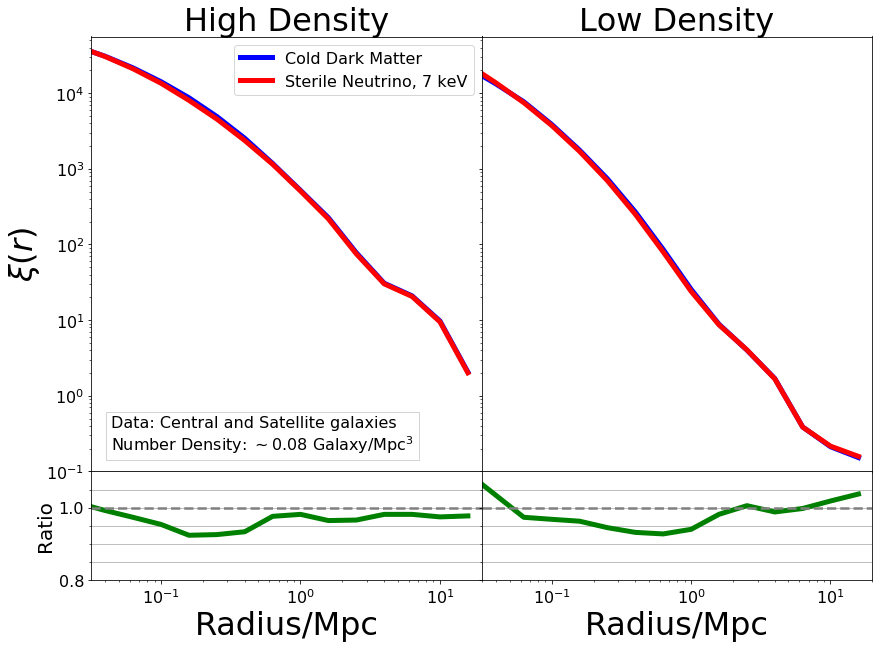

In [26]:
CUTE_cdm_high = np.genfromtxt("Output/corr_cdm_top_galaxy_position.txt", usecols = (0,1))
CUTE_cdm_low = np.genfromtxt("Output/corr_cdm_low_galaxy_position.txt", usecols = (0,1))
CUTE_wdm_high = np.genfromtxt("Output/corr_wdm_top_galaxy_position.txt", usecols = (0,1))
CUTE_wdm_low = np.genfromtxt("Output/corr_wdm_low_galaxy_position.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Number Density: $\sim0.08$ Galaxy/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(14,10))
grid = gridspec.GridSpec(2,2, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])

#High density
grid0.loglog(CUTE_cdm_high[:,0], CUTE_cdm_high[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, 
             color = "red")
grid0.text(0.05, 0.125, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.legend(fontsize = 16)
grid0.set_title('High Density',fontsize=32)

grid2.semilogx(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1]/CUTE_cdm_high[:,1], linewidth = 5, color = "green")
grid2.set_xlabel("Radius/Mpc", fontsize = 32)
grid2.set_ylabel("Ratio", fontsize=20)
grid2.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid2.set_xlim(10**-1.75, 2e1)
grid2.set_ylim(0.4, 1.4)

#Low density
grid1.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid1.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, 
             color = "red")
grid1.set_xlim(10**-1.75, 2e1)
grid1.set_title('Low Density',fontsize=32)

grid3.semilogx(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1]/CUTE_cdm_low[:,1], linewidth = 5, color = "green")
grid3.set_xlabel("Radius/Mpc", fontsize = 32)
grid3.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid3.set_ylim(0.4, 1.4)

for i in range(4):
    plt.subplot(grid[i]).set_xlim(10**-1.5, 2e1)
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).tick_params(labelsize=16)
    
for i in [0,1]:
    plt.subplot(grid[i]).set_ylim(10**-1, 10**4.75)
    
for i in [2,3]:
    plt.subplot(grid[i]).set_ylim(0.8, 1.1)
    plt.subplot(grid[i]).yaxis.grid(which = "both")
    
for i in [1,3]:
    plt.subplot(grid[i]).set_yticklabels([])
    
plt.show()

# Try it again with fixed abundance
### At n = 0.03 Galaxy/Mpc$^3$

In [27]:
cdm_len,wdm_len = len(cdm_top_galaxy_mass_filtered), len(wdm_top_galaxy_mass_filtered)
cdm_top_galaxy_mass_ind = sorted(range(cdm_len), key=lambda k: cdm_top_galaxy_mass_filtered[k], reverse = True)
cdm_low_galaxy_mass_ind = sorted(range(cdm_len), key=lambda k: cdm_low_galaxy_mass_filtered[k], reverse = True)
wdm_top_galaxy_mass_ind = sorted(range(wdm_len), key=lambda k: wdm_top_galaxy_mass_filtered[k], reverse = True)
wdm_low_galaxy_mass_ind = sorted(range(wdm_len), key=lambda k: wdm_low_galaxy_mass_filtered[k], reverse = True)

cdm_top_galaxy_mass_filtered[cdm_top_galaxy_mass_ind], cdm_low_galaxy_mass_filtered[cdm_low_galaxy_mass_ind]

(array([3.56176069e+11, 2.93528273e+11, 2.72872047e+11, ...,
        1.00003362e+06, 1.00002256e+06, 1.00001119e+06]),
 array([1.89113467e+11, 1.85729303e+11, 1.66662980e+11, ...,
        1.00031750e+06, 1.00024888e+06, 1.00007712e+06]))

In [28]:
cdm_top_galaxy_position = cdm_galaxy_position_filtered[cdm_envelope_mass_filtered>th_top_cdm]
cdm_low_galaxy_position = cdm_galaxy_position_filtered[cdm_envelope_mass_filtered<th_low_cdm]
wdm_top_galaxy_position = wdm_galaxy_position_filtered[wdm_envelope_mass_filtered>th_top_wdm]
wdm_low_galaxy_position = wdm_galaxy_position_filtered[wdm_envelope_mass_filtered<th_low_wdm]

In [29]:
np.savetxt("Calculations/cdm_top_galaxy_position_filtered.txt", 
           cdm_top_galaxy_position[cdm_top_galaxy_mass_ind[:30000]], fmt = "%f %f %f")
np.savetxt("Calculations/cdm_low_galaxy_position_filtered.txt", 
           cdm_low_galaxy_position[cdm_low_galaxy_mass_ind[:30000]], fmt = "%f %f %f")
np.savetxt("Calculations/wdm_top_galaxy_position_filtered.txt", 
           wdm_top_galaxy_position[wdm_top_galaxy_mass_ind[:30000]], fmt = "%f %f %f")
np.savetxt("Calculations/wdm_low_galaxy_position_filtered.txt", 
           wdm_low_galaxy_position[wdm_low_galaxy_mass_ind[:30000]], fmt = "%f %f %f")

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


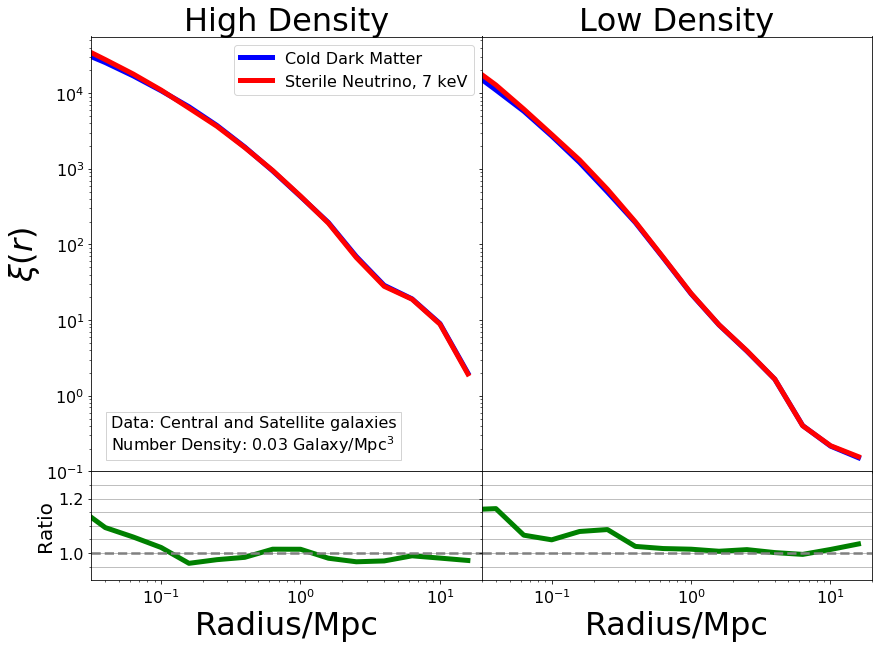

In [30]:
CUTE_cdm_high = np.genfromtxt("Output/corr_cdm_top_galaxy_position_filtered.txt", usecols = (0,1))
CUTE_cdm_low = np.genfromtxt("Output/corr_cdm_low_galaxy_position_filtered.txt", usecols = (0,1))
CUTE_wdm_high = np.genfromtxt("Output/corr_wdm_top_galaxy_position_filtered.txt", usecols = (0,1))
CUTE_wdm_low = np.genfromtxt("Output/corr_wdm_low_galaxy_position_filtered.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Number Density: 0.03 Galaxy/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(14,10))
grid = gridspec.GridSpec(2,2, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])

#High density
grid0.loglog(CUTE_cdm_high[:,0], CUTE_cdm_high[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, 
             color = "red")
grid0.text(0.05, 0.125, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.set_title('High Density',fontsize=32)
grid0.legend(fontsize = 16)

grid2.semilogx(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1]/CUTE_cdm_high[:,1], linewidth = 5, color = "green")
grid2.set_xlabel("Radius/Mpc", fontsize = 32)
grid2.set_ylabel("Ratio", fontsize=20)
grid2.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)

#Low density
grid1.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid1.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, 
             color = "red")
grid1.set_title('Low Density',fontsize=32)

grid3.semilogx(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1]/CUTE_cdm_low[:,1], linewidth = 5, color = "green")
grid3.set_xlabel("Radius/Mpc", fontsize = 32)
grid3.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)

for i in range(4):
    plt.subplot(grid[i]).set_xlim(10**-1.5, 2e1)
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).tick_params(labelsize=16)
    
for i in [0,1]:
    plt.subplot(grid[i]).set_ylim(10**-1, 10**4.75)
    
for i in [2,3]:
    plt.subplot(grid[i]).set_ylim(0.9, 1.3)
    plt.subplot(grid[i]).yaxis.grid(which = "both")
    
for i in [1,3]:
    plt.subplot(grid[i]).set_yticklabels([])
    
plt.savefig('Images/Summer2020/Correlation.pdf')
plt.show()